In [1]:
from scipy.io import loadmat
from matplotlib.pyplot import * 
import matplotlib.pyplot as plt

import os
import scipy.sparse as sp
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

from coclust.io.data_loading import load_doc_term_data
from coclust.visualization import (plot_reorganized_matrix,
                                  plot_cluster_top_terms,
                                  plot_max_modularities)
from coclust.evaluation.internal import best_modularity_partition
from coclust.coclustering import CoclustMod
from coclust.coclustering import CoclustInfo

In [2]:
## CSTR
file_name = "datasets/cstr.mat"
cstr = loadmat(file_name)

## WebKB4
## WebACE
file_name = "datasets/WebACE.mat"
WebACE = loadmat(file_name)

## NG10
## NG20
file_name = "datasets/NG20.mat"
NG20 = loadmat(file_name)

## RCV1
file_name = "datasets/RCV1_ori.mat"
RCV1 = loadmat(file_name)

## Reviews
file_name = "datasets/reviews.mat"
reviews = loadmat(file_name)

## Sports
file_name = "datasets/sports.mat"
sports = loadmat(file_name)

## Classic3
file_name = "datasets/classic3.mat"
classic3 = loadmat(file_name)

## Classic4
file_path = os.path.join('datasets', "classic4.txt")
nb_row = 7095
nb_col = 5896
classic4 = sp.lil_matrix((nb_row, nb_col))


#print(np.sum(classic4[0:10,1:15].toarray()))
#print()
#print(np.unique(WebACE['fea']))
#print()
#print(np.unique(reviews['dtm'].toarray()))


### Very important ! R starts from 1 so NaNs indexes need to be decreased by 1

In [3]:
#print(np.isnan(WebACE['fea'].data).any())
#WebACE['fea'][0,0] = float('nan')
#reviews['dtm'] WebACE['fea']

file_name = "MissWebACE.csv"
missX = pd.read_csv(file_name)

file_name = "NaNs.mat"
NaNs = loadmat(file_name)
NaN = pd.DataFrame(list(zip(NaNs['row'][0]-1, NaNs['col'][0]-1)), columns =['row','col'])

# Apply coclustInfo with Imputation
coclustInfoImput = CoclustInfo(20, 20, max_iter=15, missing_indexes=NaN)
coclustInfoImput.fit(missX.values)

## Test without Imputation
coclustInfo = CoclustInfo(20, 20, max_iter=15)
coclustInfo.fit(missX.values)

Max Iterations: 15
Iteration : 1  -- With Imputation -- 
615261.2954470555
612660.7980195752
Iteration : 2  -- With Imputation -- 
612679.0600701617
612661.8882909421
Iteration : 3  -- With Imputation -- 
612648.4309994765
612645.767855891
Iteration : 4  -- With Imputation -- 
612628.536194867
612617.5018618389
Iteration : 5  -- With Imputation -- 
612605.4064271068
612586.8743938569
Iteration : 6  -- With Imputation -- 
612584.0000279433
612579.7730468065
Iteration : 7  -- With Imputation -- 
612552.2319125598
612552.0895392739
Iteration : 8  -- With Imputation -- 
612552.8167605407
612565.4460060167
Iteration : 9  -- With Imputation -- 
612562.2174740518
612561.1688963264
Iteration : 10  -- With Imputation -- 
612545.8449565407
612536.1028100103
Iteration : 11  -- With Imputation -- 
612516.8535987407
612508.9626831334
Iteration : 12  -- With Imputation -- 
612511.8351004128
612518.0097206458
Iteration : 13  -- With Imputation -- 
612518.5243791596
612515.3278995524
Iteration : 14  -

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CoclustInfo(init=None, max_iter=15, missing_indexes=None, n_col_clusters=20,
            n_init=1, n_row_clusters=20, random_state=None, tol=1e-09)

In [ ]:
print(missX2.values.sum())
print(coclustInfoImput.X.sum())
print(WebACE['fea'].sum())

In [ ]:
figure(num=None, figsize=(20, 20), dpi=32, facecolor='w', edgecolor='k')
subplot(1, 2, 2)
plot_reorganized_matrix(missX.values, coclustInfo)

figure(num=None, figsize=(20, 20), dpi=32, facecolor='w', edgecolor='k')
subplot(1, 2, 2)
plot_reorganized_matrix(coclustInfoImput.X, coclustInfoImput)

# CoclustMod on MissMDA

In [3]:
file_name = "MissWebACE.csv"
missX2 = pd.read_csv(file_name)

file_name = "NaNs.mat"
NaNs = loadmat(file_name)
NaN = pd.DataFrame(list(zip(NaNs['row'][0]-1, NaNs['col'][0]-1)), columns =['row','col'])

coclustModImput = CoclustMod(20, missing_indexes=NaN)
coclustModImput.fit(missX2.values)

print()

## Test without imputation
coclustMod = CoclustMod(20)
coclustMod.fit(missX2.values)

Iteration : 0  -- With Imputation -- 
(133, 58)
(133, 49)
(133, 57)
(133, 56)
(133, 49)
(133, 43)
(133, 60)
(133, 47)
(133, 44)
(133, 59)
(133, 39)
(133, 43)
(133, 44)
(133, 58)
(133, 48)
(133, 35)
(133, 44)
(133, 56)
(133, 41)
(133, 70)
(114, 58)
(114, 49)
(114, 57)
(114, 56)
(114, 49)
(114, 43)
(114, 60)
(114, 47)
(114, 44)
(114, 59)
(114, 39)
(114, 43)
(114, 44)
(114, 58)
(114, 48)
(114, 35)
(114, 44)
(114, 56)
(114, 41)
(114, 70)
(113, 58)
(113, 49)
(113, 57)
(113, 56)
(113, 49)
(113, 43)
(113, 60)
(113, 47)
(113, 44)
(113, 59)
(113, 39)
(113, 43)
(113, 44)
(113, 58)
(113, 48)
(113, 35)
(113, 44)
(113, 56)
(113, 41)
(113, 70)
(197, 58)
(197, 49)
(197, 57)
(197, 56)
(197, 49)
(197, 43)
(197, 60)
(197, 47)
(197, 44)
(197, 59)
(197, 39)
(197, 43)
(197, 44)
(197, 58)
(197, 48)
(197, 35)
(197, 44)
(197, 56)
(197, 41)
(197, 70)
(143, 58)
(143, 49)
(143, 57)
(143, 56)
(143, 49)
(143, 43)
(143, 60)
(143, 47)
(143, 44)
(143, 59)
(143, 39)
(143, 43)
(143, 44)
(143, 58)
(143, 48)
(143, 35)
(1

(118, 47)
(118, 5)
(118, 13)
(118, 191)
(118, 183)
(118, 32)
(118, 17)
(118, 24)
(118, 4)
(118, 14)
(118, 153)
(118, 5)
(118, 12)
(118, 37)
(118, 62)
(118, 2)
(118, 33)
(118, 83)
(118, 21)
(118, 62)
(51, 47)
(51, 5)
(51, 13)
(51, 191)
(51, 183)
(51, 32)
(51, 17)
(51, 24)
(51, 4)
(51, 14)
(51, 153)
(51, 5)
(51, 12)
(51, 37)
(51, 62)
(51, 2)
(51, 33)
(51, 83)
(51, 21)
(51, 62)
(61, 47)
(61, 5)
(61, 13)
(61, 191)
(61, 183)
(61, 32)
(61, 17)
(61, 24)
(61, 4)
(61, 14)
(61, 153)
(61, 5)
(61, 12)
(61, 37)
(61, 62)
(61, 2)
(61, 33)
(61, 83)
(61, 21)
(61, 62)
(393, 47)
(393, 5)
(393, 13)
(393, 191)
(393, 183)
(393, 32)
(393, 17)
(393, 24)
(393, 4)
(393, 14)
(393, 153)
(393, 5)
(393, 12)
(393, 37)
(393, 62)
(393, 2)
(393, 33)
(393, 83)
(393, 21)
(393, 62)
(230, 47)
(230, 5)
(230, 13)
(230, 191)
(230, 183)
(230, 32)
(230, 17)
(230, 24)
(230, 4)
(230, 14)
(230, 153)
(230, 5)
(230, 12)
(230, 37)
(230, 62)
(230, 2)
(230, 33)
(230, 83)
(230, 21)
(230, 62)
(79, 47)
(79, 5)
(79, 13)
(79, 191)
(79, 183)

Iteration : 3  -- With Imputation -- 
(98, 40)
(98, 3)
(98, 218)
(98, 197)
(98, 26)
(98, 9)
(98, 18)
(98, 2)
(98, 1)
(98, 224)
(98, 1)
(98, 7)
(98, 4)
(98, 68)
(98, 1)
(98, 38)
(98, 73)
(98, 15)
(98, 55)
(4, 40)
(4, 3)
(4, 218)
(4, 197)
(4, 26)
(4, 9)
(4, 18)
(4, 2)
(4, 1)
(4, 224)
(4, 7)
(4, 68)
(4, 1)
(4, 38)
(4, 73)
(4, 15)
(4, 55)
(661, 40)
(661, 3)
(661, 218)
(661, 197)
(661, 26)
(661, 9)
(661, 18)
(661, 2)
(661, 1)
(661, 224)
(661, 1)
(661, 7)
(661, 4)
(661, 68)
(661, 1)
(661, 38)
(661, 73)
(661, 15)
(661, 55)
(338, 40)
(338, 3)
(338, 218)
(338, 197)
(338, 26)
(338, 9)
(338, 18)
(338, 2)
(338, 1)
(338, 224)
(338, 1)
(338, 7)
(338, 4)
(338, 68)
(338, 1)
(338, 38)
(338, 73)
(338, 15)
(338, 55)
(80, 40)
(80, 3)
(80, 218)
(80, 197)
(80, 26)
(80, 9)
(80, 18)
(80, 2)
(80, 1)
(80, 224)
(80, 1)
(80, 7)
(80, 4)
(80, 68)
(80, 1)
(80, 38)
(80, 73)
(80, 15)
(80, 55)
(18, 40)
(18, 3)
(18, 218)
(18, 197)
(18, 26)
(18, 9)
(18, 18)
(18, 2)
(18, 1)
(18, 224)
(18, 1)
(18, 7)
(18, 4)
(18, 68)
(18, 

Iteration : 5  -- With Imputation -- 
(89, 36)
(89, 246)
(89, 204)
(89, 26)
(89, 7)
(89, 5)
(89, 231)
(89, 67)
(89, 37)
(89, 75)
(89, 10)
(89, 56)
(731, 36)
(731, 246)
(731, 204)
(731, 26)
(731, 7)
(731, 5)
(731, 231)
(731, 67)
(731, 37)
(731, 75)
(731, 10)
(731, 56)
(358, 36)
(358, 246)
(358, 204)
(358, 26)
(358, 7)
(358, 5)
(358, 231)
(358, 67)
(358, 37)
(358, 75)
(358, 10)
(358, 56)
(75, 36)
(75, 246)
(75, 204)
(75, 26)
(75, 7)
(75, 5)
(75, 231)
(75, 67)
(75, 37)
(75, 75)
(75, 10)
(75, 56)
(15, 36)
(15, 246)
(15, 204)
(15, 26)
(15, 7)
(15, 5)
(15, 231)
(15, 67)
(15, 37)
(15, 75)
(15, 10)
(15, 56)
(19, 36)
(19, 246)
(19, 204)
(19, 26)
(19, 7)
(19, 5)
(19, 231)
(19, 67)
(19, 37)
(19, 75)
(19, 10)
(19, 56)
(493, 36)
(493, 246)
(493, 204)
(493, 26)
(493, 7)
(493, 5)
(493, 231)
(493, 67)
(493, 37)
(493, 75)
(493, 10)
(493, 56)
(151, 36)
(151, 246)
(151, 204)
(151, 26)
(151, 7)
(151, 5)
(151, 231)
(151, 67)
(151, 37)
(151, 75)
(151, 10)
(151, 56)
(83, 36)
(83, 246)
(83, 204)
(83, 26)
(83,

Iteration : 8  -- With Imputation -- 
(83, 33)
(83, 253)
(83, 209)
(83, 24)
(83, 4)
(83, 5)
(83, 230)
(83, 66)
(83, 32)
(83, 79)
(83, 10)
(83, 55)
(740, 33)
(740, 253)
(740, 209)
(740, 24)
(740, 4)
(740, 5)
(740, 230)
(740, 66)
(740, 32)
(740, 79)
(740, 10)
(740, 55)
(365, 33)
(365, 253)
(365, 209)
(365, 24)
(365, 4)
(365, 5)
(365, 230)
(365, 66)
(365, 32)
(365, 79)
(365, 10)
(365, 55)
(77, 33)
(77, 253)
(77, 209)
(77, 24)
(77, 4)
(77, 5)
(77, 230)
(77, 66)
(77, 32)
(77, 79)
(77, 10)
(77, 55)
(10, 33)
(10, 253)
(10, 209)
(10, 24)
(10, 4)
(10, 5)
(10, 230)
(10, 66)
(10, 32)
(10, 79)
(10, 10)
(10, 55)
(19, 33)
(19, 253)
(19, 209)
(19, 24)
(19, 4)
(19, 5)
(19, 230)
(19, 66)
(19, 32)
(19, 79)
(19, 10)
(19, 55)
(492, 33)
(492, 253)
(492, 209)
(492, 24)
(492, 4)
(492, 5)
(492, 230)
(492, 66)
(492, 32)
(492, 79)
(492, 10)
(492, 55)
(152, 33)
(152, 253)
(152, 209)
(152, 24)
(152, 4)
(152, 5)
(152, 230)
(152, 66)
(152, 32)
(152, 79)
(152, 10)
(152, 55)
(74, 33)
(74, 253)
(74, 209)
(74, 24)
(74,

Iteration : 11  -- With Imputation -- 
(83, 33)
(83, 253)
(83, 223)
(83, 24)
(83, 1)
(83, 5)
(83, 229)
(83, 67)
(83, 21)
(83, 79)
(83, 10)
(83, 55)
(736, 33)
(736, 253)
(736, 223)
(736, 24)
(736, 1)
(736, 5)
(736, 229)
(736, 67)
(736, 21)
(736, 79)
(736, 10)
(736, 55)
(383, 33)
(383, 253)
(383, 223)
(383, 24)
(383, 1)
(383, 5)
(383, 229)
(383, 67)
(383, 21)
(383, 79)
(383, 10)
(383, 55)
(75, 33)
(75, 253)
(75, 223)
(75, 24)
(75, 1)
(75, 5)
(75, 229)
(75, 67)
(75, 21)
(75, 79)
(75, 10)
(75, 55)
(4, 33)
(4, 253)
(4, 223)
(4, 24)
(4, 1)
(4, 5)
(4, 229)
(4, 67)
(4, 21)
(4, 79)
(4, 10)
(4, 55)
(19, 33)
(19, 253)
(19, 223)
(19, 24)
(19, 1)
(19, 5)
(19, 229)
(19, 67)
(19, 21)
(19, 79)
(19, 10)
(19, 55)
(492, 33)
(492, 253)
(492, 223)
(492, 24)
(492, 1)
(492, 5)
(492, 229)
(492, 67)
(492, 21)
(492, 79)
(492, 10)
(492, 55)
(153, 33)
(153, 253)
(153, 223)
(153, 24)
(153, 1)
(153, 5)
(153, 229)
(153, 67)
(153, 21)
(153, 79)
(153, 10)
(153, 55)
(66, 33)
(66, 253)
(66, 223)
(66, 24)
(66, 1)
(66, 5)

/usr/local/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CoclustMod(init=None, max_iter=20, missing_indexes=None, n_clusters=20,
           n_init=1, random_state=None, tol=1e-09)

In [4]:
print(missX2.values.sum())
print(coclustModImput.X.sum())
print(WebACE['fea'].sum())

615261.2954470558
614274.2463675326
613635.0807507811


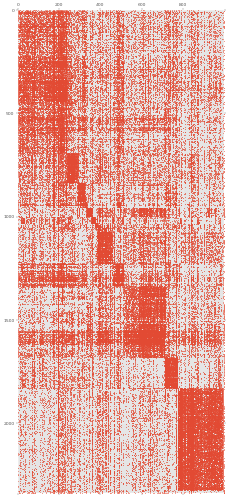

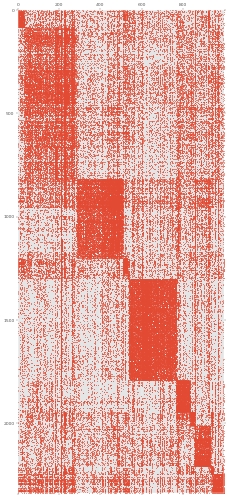

In [11]:
figure(num=None, figsize=(20, 20), dpi=32, facecolor='w', edgecolor='k')
subplot(1, 2, 2)
plot_reorganized_matrix(missX2.values, coclustMod)

figure(num=None, figsize=(20, 20), dpi=32, facecolor='w', edgecolor='k')
subplot(1, 2, 2)
plot_reorganized_matrix(coclustModImput.X, coclustModImput)

In [ ]:
'''
    print(X.shape)
    print(model.Z.shape)
    print(model.W.shape)

    print(model.W[0:5,:].todense())
    print()
    print(model.Z[0:5,:].todense())
'''

In [9]:
pca_orig = PCA(n_components=2).fit_transform(WebACE['fea'])
pca_miss = PCA(n_components=2).fit_transform(coclustInfo_Imput.X.toarray())

In [41]:
from sklearn.manifold import MDS
mds_orig = MDS(n_components=2).fit_transform(WebACE['fea'])
mds_miss = MDS(n_components=2).fit_transform(coclustInfo_Imput.X.toarray())

In [42]:
from sklearn.manifold import TSNE
tsne_orig = TSNE(n_components=2).fit_transform(WebACE['fea'])
tsne_miss = TSNE(n_components=2).fit_transform(coclustInfo_Imput.X.toarray())

NameError: name 'mds_orig' is not defined

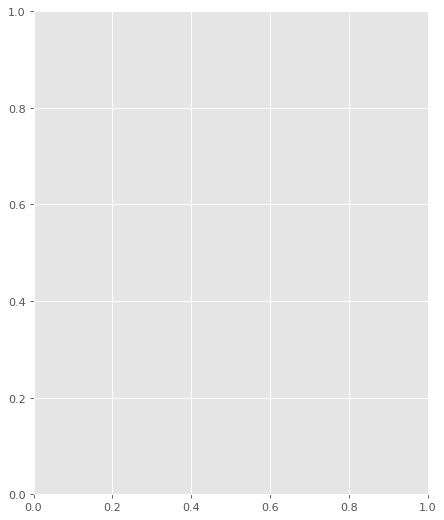

In [43]:
from matplotlib import pyplot as plt

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = WebACE['gnd'][:,0]
## Isomap
subplot(1, 2, 1)
scatter(mds_orig[:,0], mds_orig[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Original Data')
## PCA
subplot(1, 2, 2)
scatter(mds_miss[:,0], mds_miss[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on MissMDA')

Text(0.5, 1.0, 'PCA on MissMDA')

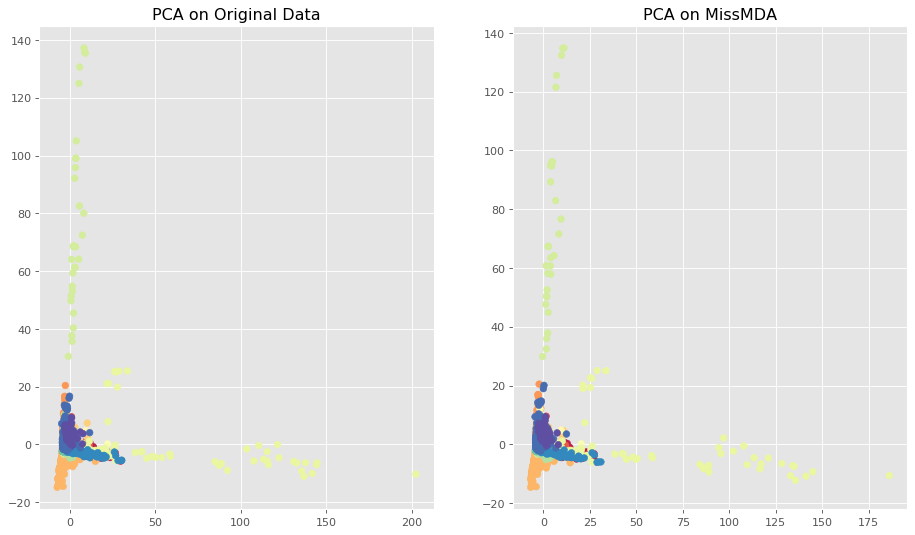

In [10]:
from matplotlib import pyplot as plt

figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
color = WebACE['gnd'][:,0]
## Isomap
subplot(1, 2, 1)
scatter(pca_orig[:,0], pca_orig[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on Original Data')
## PCA
subplot(1, 2, 2)
scatter(pca_miss[:,0], pca_miss[:,1], c=color, cmap=plt.cm.Spectral)
title('PCA on MissMDA')

In [60]:
'''
Manual A calculation
A = np.zeros((20,20))
for i in range(coMod_model.Z.shape[1]):
    Z_ind = np.where(coMod_model.Z[:,i] == 1)
    for j in range(coMod_model.W.shape[1]):
        W_ind = np.where(coMod_model.W[:,j] == 1)
        cmp = 0
        n = 0
        for ii in Z_ind[0]:
            for jj in W_ind[0]:
                cmp += missX2.values[ii,jj]
                n += 1
        if n==0:
            A[i,j] = 0
        else:
            A[i,j] = cmp/n
'''

In [9]:
a=[[1],[2]]

In [10]:
if not a :
    print('ok')

In [12]:
%cd coclust
#!os.chdir('./coclust')
!python3 setup.py install
%cd ..

/Users/amine/Desktop/Coclustering-Imputation/coclust
running install
running bdist_egg
running egg_info
writing coclust.egg-info/PKG-INFO
writing dependency_links to coclust.egg-info/dependency_links.txt
writing entry points to coclust.egg-info/entry_points.txt
writing requirements to coclust.egg-info/requires.txt
writing top-level names to coclust.egg-info/top_level.txt
reading manifest file 'coclust.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'coclust.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.15-x86_64/egg
running install_lib
running build_py
copying coclust/coclustering/coclust_mod.py -> build/lib/coclust/coclustering
creating build/bdist.macosx-10.15-x86_64/egg
creating build/bdist.macosx-10.15-x86_64/egg/coclust
creating build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclust/visualization/__init__.py -> build/bdist.macosx-10.15-x86_64/egg/coclust/visualization
copying build/lib/coclus